#**ENS'IA Session 2**

Welcome to the second AI session!  
Today you will code a **Neural Network**!

In [12]:
#Some useful imports
import math
from pylab import *
import matplotlib.pyplot as plt
from random import *
import numpy as np

Last session, we took a look at the behavior of a single neuron.  
This time, we'll code a layer of neurons!
#Making the dataset
But first, we'll create our dataset. We'll try to make the Network learn about the unit circle!  
More precisely, we'll want the network to replicate the function:
$$x,y \longrightarrow 
      \left\{
        \begin{array}{ll}
            1 & \mbox{if } x^2+y^2 \leq 1 \\
            0 & \mbox{otherwise}
        \end{array}
        \right.
$$

To do that, we'll make a grid of $N$x$N$ points of $[-1.5,1.5]^2$

In [13]:
#We are on a NxN grid.
N = 50

#List of all the points in [-1.5,1.5]^2 on an evenly spaced 50x50 grid
X_train = np.array([(i//N - N//2,i%N - N//2) for i in range(N*N)])/(N//3)

#We make this copy for future use
dots = np.copy(X_train)

#And we prepare the outputs
Y_train = np.array([int(i*i+j*j <= 1) for i,j in X_train])

X_train = X_train.reshape(N*N,2,1) #We change the shape to make it more adapted: we'll get into why in a later session

Let's look at our dataset:

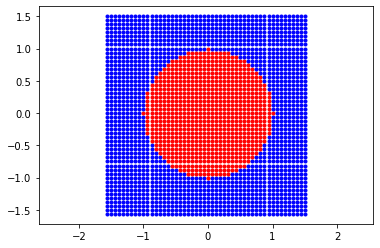

In [14]:
for i in range(len(Y_train)):
    if Y_train[i]:
        plt.plot(dots[i][0],dots[i][1],"r.")
    else:
        plt.plot(dots[i][0],dots[i][1],"b.")

plt.axis("equal") 
plt.show()

# Creating the Layers

So, in order to create a layer of neurons, we'll create a class *Layer*, that can do the same things a neuron can:
- the forward function computes the forward value of each neuron in the layer
- the backward function computes the backward value of each neuron in the layer, and updates the parameters in the case of a Dense Layer.  

In [15]:
class Layer:

  """
    For the moment, we don't define any of the functions.
    We just set the value of the input to None.
  """
  def __init__(self):
    # Reminder, in the __init__ method, we define what the object is composed of. Here it has a "input" field
    self.input = None

  def forward(self, input):
    # The keyword "pass" means "do nothing". If we just write nothing, there will be an error stating that the function is not complete.
    # "pass" is the keyword that means "this function does nothing but it is intentionnal" 
    pass 

  def backward(self, output_gradient, learning_rate):
    pass

As we've seen in the presentation, we will split the Layer into a Dense and Sigmoid Layer.

## Dense layers
Let's say we have a Dense layer with input size p and output size q.  
It has two attributes: a weights matrix $W = (w_{ij})_{i,j \in [1,p]𝙭[1,q]}$, and a bias vector $B = (b_i)_{i \in [1,q]}$.


### Forward propagation

if we have as an input a vector $X = (x_i)_{i \in [1,p]}$, then the output $Y = (y_i)_{i \in [1,q]}$ would be :  
$$\begin{align} \forall i \in [1,q],\ \  y_i &= \sum_{j=0}^q w_{ij}x_j + b_i \\
\end{align}$$

Therefore, we get:  $$Y = W.X + B$$
Which can be written elegantly with numpy functions.  
Refer to the annex at the bottom of this notebook for some useful numpy functions !

### Backpropagation

We receive $\frac{\partial L}{\partial Y}$, the gradient, from the next layer, and we want to compute:
- $\frac{\partial L}{\partial W} = (\frac{\partial L}{\partial w_{ij}})_{i,j}$ : to update the weights
- $\frac{\partial L}{\partial B} = (\frac{\partial L}{\partial b_i})_i$ : to update the biases
- $\frac{\partial L}{\partial X} = (\frac{\partial L}{\partial x_i})_i$ : to give to the previous layer (i.e. the output of the function)

Here's the formula for each one:
$$\begin{align}
&\frac{\partial L}{\partial W} = \frac{\partial L}{\partial Y}.X^T \\ \\
&\frac{\partial L}{\partial B} = \frac{\partial L}{\partial Y} \\ \\
&\frac{\partial L}{\partial X} = W^T.\frac{\partial L}{\partial Y}
\end{align}$$  
These can also be elegantly computed using numpy functions !  **Do not try to do it manually !**

As a reminder, when updating the parameters, we do:  
$$W = W -\eta \frac{\partial L}{\partial W}$$  
$$B = B -\eta \frac{\partial L}{\partial B}$$

The proof for finding each formula is detailled below :
- Using the chain rule :
$$\forall i,j , \ \ \frac{\partial L}{\partial w_{ij}} = \sum_{k=0}^q\frac{\partial L}{\partial y_k}\frac{\partial y_k}{\partial w_{ij}}$$
But : $$ y_k = \sum_{j=0}^pw_{kj}x_j + b_k$$
Therefore : $$\frac{\partial y_k}{\partial w_{ij}} =  
\begin{cases}
 x_j \text{ if } i = k \\
 0 \text{ otherwise}
\end{cases}$$
And thus we get: $$\frac{\partial L}{\partial w_{ij}} = \frac{\partial L}{\partial y_i}\frac{\partial y_i}{\partial w_{ij}} = \frac{\partial L}{\partial y_i}x_j$$  
Finally : $$\frac{\partial L}{\partial W}  = \frac{\partial L}{\partial Y}.X^T$$  


- Using the same reasoning, we can deduce that:
$$\forall i, \ \ \frac{\partial L}{\partial b_i} = \sum_{k=0}^q\frac{\partial L}{\partial y_k}\frac{\partial y_k}{\partial b_i}$$
And :
$$\frac{\partial y_k}{\partial b_i} =  
\begin{cases}
 1 \text{ if } i = k \\
 0 \text{ otherwise}
\end{cases}$$
And we simply get:$$\frac{\partial L}{\partial B} = \frac{\partial L}{\partial Y}$$

- Using the chain rule again:
$$\forall i, \ \ \frac{\partial L}{\partial x_i} = \sum_{k=0}^q\frac{\partial L}{\partial y_k}\frac{\partial y_k}{\partial x_i}$$
And : $$\frac{\partial y_k}{\partial x_i} =\begin{cases}
 w_{ki} \text{ if } i = k \\
 0 \text{ otherwise}
\end{cases}$$
Therefore :
$$ \frac{\partial L}{\partial x_i} = \frac{\partial L}{\partial y_i}\frac{\partial y_i}{\partial x_i}$$
which translates to :
$$\frac{\partial L}{\partial X} = W^T.\frac{\partial L}{\partial Y}$$
which is the output of the backward function.




In [16]:
class Dense(Layer):

  """
    This class is inherited from the class "Layer", which means it has the same functions
    and attributes as the class "Layer".
    This layer has a weights matrix and a biases vector.
  """
  def __init__(self, input_size, output_size):
    self.weights = np.random.randn(output_size, input_size)
    self.bias = np.random.randn(output_size, 1)

  """
    Computes the output vector
    This function must also set the value of self.input
  """
  def forward(self, input):
    self.input = input

    return np.dot(self.weights, self.input) + self.bias

  """
    Updates the weights matrix and the bias vector,
    Then returns the gradient of the error in with respect to the input
  """
  def backward(self, output_gradient):
    learning_rate = 0.1 #fixed value

    #We compute dL/DW
    weights_gradient = np.dot(output_gradient,self.input.T)

    #We update the parameters
    self.weights -= learning_rate * weights_gradient 
    self.bias -= learning_rate * output_gradient

    return np.dot(self.weights.T, output_gradient)

Let's test it !

In [17]:
test_layer = Dense(2,4)

#setting concrete values
test_layer.weights = np.array([[1., 2.], [3., 4.], [5., 6.], [7., 8.]])
test_layer.bias = np.array([[-1.], [2.], [-3.], [4.]])

input = np.array([[-1], [2]])
expected_output = np.array([[2], [7], [4], [13]])

#forward test

print("output of the layer :\n",test_layer.forward(input))
np.testing.assert_almost_equal(expected_output,test_layer.forward(input),3)



output_gradient = np.array([[0], [1], [0], [-1]])
expected_gradient = np.array([[-3.8], [-4.4]])
expected_weights = np.array([[1., 2.], [3.1, 3.8], [5., 6.], [6.9, 8.2]])
expected_bias = np.array([[-1], [1.9], [-3.], [4.1]])

#backward test
obtained_gradient = test_layer.backward(output_gradient)
print("dL/dX computed by the layer :\n", obtained_gradient)
print("updated weights :\n", test_layer.weights)
print("updated bias :\n", test_layer.bias)

np.testing.assert_almost_equal(obtained_gradient,expected_gradient,3)
np.testing.assert_almost_equal(test_layer.weights, expected_weights, 3)
np.testing.assert_almost_equal(test_layer.bias, expected_bias, 3)


output of the layer :
 [[ 2.]
 [ 7.]
 [ 4.]
 [13.]]
dL/dX computed by the layer :
 [[-3.8]
 [-4.4]]
updated weights :
 [[1.  2. ]
 [3.1 3.8]
 [5.  6. ]
 [6.9 8.2]]
updated bias :
 [[-1. ]
 [ 1.9]
 [-3. ]
 [ 4.1]]


## Sigmoid Layer
For the Sigmoid layer, we won't need any special attributes.

### Forward propagation

if we have as an input a vector $X = (x_i)_{i \in [1,p]}$, then the output $Y = (y_i)_{i \in [1,q]}$ would be : 

$$\forall i \in [1,q], \ \ y_i = \sigma(x_i)$$

We get:  $$Y = \sigma(X)$$  

### Backpropagation

Since we don't need to update any parameters, we'll just need to compute :
- $\frac{\partial L}{\partial X}$ : to give to the previous layer (the output of this function)

Here's the formula :

$$ \frac{\partial L}{\partial X} = \frac{\partial L}{\partial Y}\sigma'(X)$$  
**Note that this is NOT a matrix multiplication, but the result of multiplying each coefficients one on one.**

The proof for finding the formula is detailled below :
- Using the chain rule :
$$\forall i, \ \ \frac{\partial L}{\partial x_i} = \sum_{k=0}^q\frac{\partial L}{\partial y_k}\frac{\partial y_k}{\partial x_i}$$
But : $$ y_k = \sigma(x_k)$$
Therefore : $$\frac{\partial y_k}{\partial x_i} =  
\begin{cases}
 \sigma'(x_i) \text{ if } i = k \\
 0 \text{ otherwise}
\end{cases}$$
And thus we get: $$\frac{\partial L}{\partial x_i} = \frac{\partial L}{\partial y_i}\frac{\partial y_i}{\partial x_i} = \frac{\partial L}{\partial y_i}\sigma'(x_i)$$  
Finally : $$\frac{\partial L}{\partial X}  = \frac{\partial L}{\partial Y}\sigma'(X)$$  

In [18]:
def sigmoid(valeur):
  return(1 / (1 + exp( - valeur )))

def sigmoid_derivative(valeur):
  return sigmoid(valeur)*(1-sigmoid(valeur))

class Sigmoid(Layer):
  """
    This class also inherits from "Layer"
  """

  """
    Computes and returns the output vector
    This function must also set the value of self.input
  """
  def forward(self, input):
    self.input = input

    return sigmoid(self.input)

  """
    Computes and returns the gradient of the error in with respect to the input
  """
  def backward(self, output_gradient):

    return np.multiply(output_gradient, sigmoid_derivative(self.input))

Let's test it !

In [19]:
test_layer = Sigmoid()

input = np.array([[1], [2], [3], [4]])
expected_output = np.array([[0.73105858], [0.88079708], [0.95257413], [0.98201379]])

#forward test
print("output of the layer :\n",test_layer.forward(input))
np.testing.assert_almost_equal(expected_output,test_layer.forward(input),3)



output_gradient = np.array([[0], [1], [0], [-1]])
expected_gradient = np.array([[0.], [0.10499359], [0.], [-0.01766271]])

#backward test

obtained_gradient = test_layer.backward(output_gradient)
print("dL/dX computed by the layer :\n", obtained_gradient)
np.testing.assert_almost_equal(obtained_gradient,expected_gradient,3)

output of the layer :
 [[0.73105858]
 [0.88079708]
 [0.95257413]
 [0.98201379]]
dL/dX computed by the layer :
 [[ 0.        ]
 [ 0.10499359]
 [ 0.        ]
 [-0.01766271]]


# Creating the Neural Network

## Forward propagation

The input fed into the neural network is passed through the first layer, then propagated to the next layer and so on until the last layer.  
This last output is the output of the network.


## Backpropagation

We first need to calculate the derivative of the loss with respect to the output.  
The Loss is calculated by the MSE (Mean Square Error): $L=\frac{1}{n}\sum_{k =1}^n(\hat{y_k} - y_k)^2$.  
By derivating : $\forall i \in [1,q], \ \ \frac{\partial L}{\partial y_i} = \frac 2 n (\hat y_i - y_i)$  
Therefore $$\frac{\partial L}{\partial Y} = \frac 2 n (\hat Y - Y)$$

This is the gradient we'll feed into the last layer, then propagated to the previous layer and so on until the first layer, updating the parameters for each layer.


## Training

In order to train, we use a batch of inputs:  
for each input,
- we compute the propagation forward,
- we compute the loss and it's derivative with respect to the output
- we compute the propagation backwards

And we loop this process for a number of epochs

In [20]:
def mse_derivative(y_expected, y_predicted):
  """
    This function calculates the derivative of the Mean Square Error
    with respect to the predicted values.
  """
  return 2 * (y_predicted - y_expected) / np.size(y_expected)



class NeuralNet:

  """
    This class represents the Neural Network, which really is just a list of Layers.
  """
  def __init__(self, layers):
    self.layers = layers

  """
    This function propagates the input through all of the layers.
    The output of a layer is the input of the next one, until there are no more layers
    In that case, the output of the last layer is the output of the network.
  """
  def forward(self, input):
    output = input
    for layer in self.layers:
      output = layer.forward(output)

    return output

  """
    This function backpropagates the gradient through each layer.
    The error with respect to the input of one layer is the error with respect to the output of the previous layer.

    grad is the loss with respect to the output
  """
  def backward(self,grad):

    #we propagate the gradient back through the layers.
    for layer in reversed(self.layers):
      grad = layer.backward(grad)

  """
    This function trains the neural network.
  """
  def train(self, input_batch, output_batch, epochs):

    for e in range(epochs):
      print("progression: " + str(e+1) + "/" + str(epochs))

      for x, y, in zip(input_batch,output_batch):
        output = self.forward(x)

        grad = mse_derivative(y, output)
        self.backward(grad)



  """
    This function returns the answer that the network is most confident with
  """
  def predict(self,input):
    prediction = self.forward(input)

    #We return the index with the highest confidence
    return np.argmax(prediction), max(prediction)

So, let's make the network !
Here, it is just a list of different layers.  

we'll be making our network with the following layers:
- Dense of output size 10
- Sigmoid
- Dense of output size 2
- Sigmoid

In [21]:
#Define your neural network here !
#Make sure the output size of a layer is the same as the input size of the next :)
net = NeuralNet([
  Dense(2,10),
  Sigmoid(),
  Dense(10,2),
  Sigmoid()
])


Let's train this neural network !

We'll choose 50 epochs.  
We have to perform some manipulations on the data to make it work properly, we'll go in more detail another time.

In [22]:
epochs = 50

def one_hot_encode(Y):
  n = Y.size
  m = max(Y)
  res = np.zeros((m+1)*n).reshape(n,m+1,1)
  for i in range(len(Y)):
    res[i][Y[i]][0] = 1

  return res

X_batch = X_train
Y_batch = one_hot_encode(Y_train)

net.train(X_batch, Y_batch, epochs)

progression: 1/50
progression: 2/50
progression: 3/50
progression: 4/50
progression: 5/50
progression: 6/50
progression: 7/50
progression: 8/50
progression: 9/50
progression: 10/50
progression: 11/50
progression: 12/50
progression: 13/50
progression: 14/50
progression: 15/50
progression: 16/50
progression: 17/50
progression: 18/50
progression: 19/50
progression: 20/50
progression: 21/50
progression: 22/50
progression: 23/50
progression: 24/50
progression: 25/50
progression: 26/50
progression: 27/50
progression: 28/50
progression: 29/50
progression: 30/50
progression: 31/50
progression: 32/50
progression: 33/50
progression: 34/50
progression: 35/50
progression: 36/50
progression: 37/50
progression: 38/50
progression: 39/50
progression: 40/50
progression: 41/50
progression: 42/50
progression: 43/50
progression: 44/50
progression: 45/50
progression: 46/50
progression: 47/50
progression: 48/50
progression: 49/50
progression: 50/50


Finally, let's plot our data !  
The points outside of the circle are in blue, the points inside are in red.  
The points that are in the circle according to the neural netork are in yellow if they actually are in the circle, an in green if they're not.

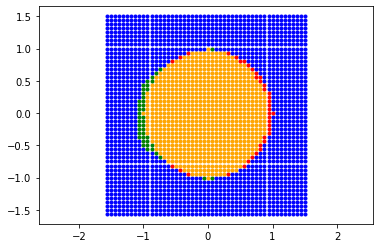

In [23]:
for i,j in dots:
  if net.predict([[i],[j]])[0]:
    if i*i+j*j <= 1:
      plt.plot(i,j,".", color="orange")
    else:
      plt.plot(i,j,"g.")
  else:
    if i*i+j*j <= 1:
      plt.plot(i,j,"r.")
    else:
      plt.plot(i,j,"b.")

plt.axis("equal")
plt.show()

## Training vizualisation
This part is already completed and is just made to make you see how the model learns. You can skip the code, just run it and observe what happened.

progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1
progression: 1/1


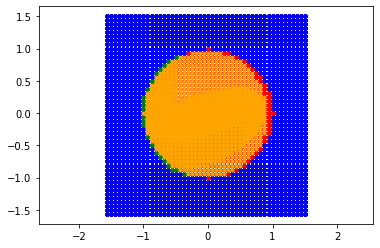

In [24]:
# New neural network (we start traing from scratch)
net = NeuralNet([
  Dense(2,10),
  Sigmoid(),
  Dense(10,2),
  Sigmoid()
])

epochs = 50 #Change this to train for longer or shorter !

for epoch in range(epochs):
  # Predict and save image
  res_in = [[],[]]
  res_out = [[],[]]
  res_fail_in = [[],[]]
  res_fail_out = [[],[]]


  for i,j in dots:
    if net.predict([[i],[j]])[0]:
      if i*i+j*j <= 1:
        res_in[0].append(i)
        res_in[1].append(j)
      else:
        res_fail_in[0].append(i)
        res_fail_in[1].append(j)
    else:
      if i*i+j*j <= 1:
        res_fail_out[0].append(i)
        res_fail_out[1].append(j)
      else:
        res_out[0].append(i)
        res_out[1].append(j)

  plt.plot(res_in[0],res_in[1],color="orange")
  plt.plot(res_out[0],res_out[1],"b.")
  plt.plot(res_fail_in[0],res_fail_in[1],"g.")
  plt.plot(res_fail_out[0],res_fail_out[1],"r.")

  plt.axis("equal")
  plt.savefig('backup{}.png'.format(epoch))

  # Train
  net.train(X_batch, Y_batch, 1)



# Last prediction
for i,j in dots:
      if net.predict([[i],[j]])[0]:
        if i*i+j*j <= 1:
          plt.plot(i,j,".", color="orange")
        else:
          plt.plot(i,j,"g.")
      else:
        if i*i+j*j <= 1:
          plt.plot(i,j,"r.")
        else:
          plt.plot(i,j,"b.")

plt.axis("equal")
plt.savefig('backup{}.png'.format(epochs))

In [25]:
# Create the gif
import imageio
images = []
for epoch in range(epochs+1):
  images.append(imageio.imread('backup{}.png'.format(epoch)))
imageio.mimsave('animated_gif.gif', images)

In [ ]:
# Show the results:
# Either click on the files button on the left panel for google colab, then double click on the gif and it will be displayed
# Or on you computer open the gif saved in the current directory

# Annex: numpy functions

Let's consider the matrix $A=(a_{ij})_{i,j \in [1,n]}$ et $B = (b_{ij})_{i,j \in [1,n]}$.  
Then we have :

- np.dot(A,B) : Computes $A.B$  
- A.T : Computes $A^T$
- np.multiply(A,B) : Computes the matrix $(a_{ij}b_{ij})_{i,j \in [1,n]}$